This notebook is used to generate an LHAPDF set that is then used as underlying law
when closure testing the POD model.

The underlying law is chosen with 40 weights and so as to respect POS constraint.


In [ ]:
from wmin.model import WMinPDF
from colibri.constants import LHAPDF_XGRID, EXPORT_LABELS
from colibri.export_results import write_exportgrid

from validphys.core import PDF

import numpy as np
import matplotlib.pyplot as plt
import os
import yaml
import pathlib

In [3]:
wmin_basis_set = PDF("250503_pod_basis_40k")
n_basis = 40
wmin_model = WMinPDF(wminpdfset = wmin_basis_set, n_basis=n_basis)


grid_values_func = wmin_model.grid_values_func(LHAPDF_XGRID)

In [4]:
weights = [-2.44584e-02,-2.27829e-03,6.86918e-03,4.33392e-02,-6.06252e-02,-2.36576e-03,-2.22891e-03,1.10946e-03,1.59785e-03,-2.39796e-02,-4.90364e-03,8.14362e-02,7.71050e-02,-2.11787e-03,3.40736e-02,9.03299e-02,3.97700e-03,-2.04571e-02,-3.12767e-03,-9.33985e-03,8.04985e-02,3.22638e-03,-6.37502e-02,-1.91750e-03,-7.71617e-02,2.59045e-03,-1.25197e-01,8.09652e-02,1.85341e-02,5.47452e-03,-5.09946e-02,-1.47552e-02,-6.09230e-03,-6.08293e-03,-9.42011e-02,2.92037e-02,-3.79023e-02,2.64634e-02,-8.94659e-02,-8.05915e-03]

underlying_law = grid_values_func(weights)

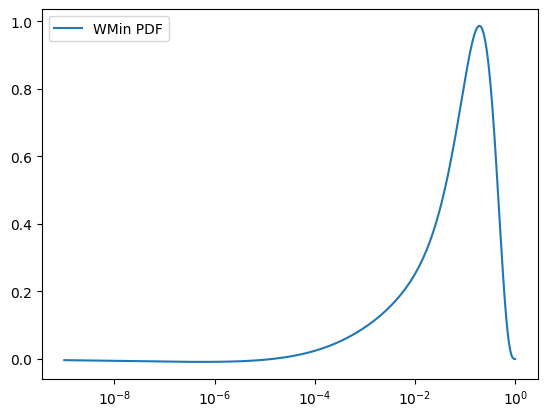

In [8]:


fig, ax = plt.subplots()
ax.plot(LHAPDF_XGRID, underlying_law[3] , label="WMin PDF")

ax.set_xscale("log")
ax.legend()

In [9]:
WRITE_GRID = np.array(underlying_law)
fit_name = "250503_pod_basis_40k_underlying_law_40w_pos"

if not os.path.exists(fit_name):
    os.makedirs(fit_name)
    os.makedirs(fit_name + "/replicas")
    os.makedirs(fit_name + "/input")
    # create runcard.yaml firl in input folder
    runc = {"theoryid": 40000000}
    with open(fit_name + "/input/runcard.yaml", "w") as f:
        f.write(yaml.dump(runc))

replicas_path = fit_name / pathlib.PosixPath("replicas")

if not os.path.exists(replicas_path):
    os.makedirs(replicas_path)

grid_for_writing = WRITE_GRID
print(grid_for_writing.shape)

replica_index = 0
rep_path = replicas_path / f"replica_{replica_index}"
rep_path.mkdir(exist_ok=True)
grid_name = rep_path / fit_name


write_exportgrid(
    grid_for_writing=grid_for_writing,
    grid_name=str(grid_name),
    replica_index=replica_index,
    Q=1.65,
    xgrid=LHAPDF_XGRID,
    export_labels=EXPORT_LABELS,
)

print("Test basis generated, still needs to be evolved")

(14, 196)
Test basis generated, still needs to be evolved
